In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '19e87faf-6c12-41d1-8411-7091fe10a8ee',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [ ]:
type(data)

In [ ]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

In [ ]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '19e87faf-6c12-41d1-8411-7091fe10a8ee',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\sebas\OneDrive\Documentos\Data Analysis\API.csv'):
        df.to_csv(r'C:\Users\sebas\OneDrive\Documentos\Data Analysis\API.csv',header='column_names')
    else:
        df.to_csv(r'C:\Users\sebas\OneDrive\Documentos\Data Analysis\API.csv',mode='a',header=False)

In [ ]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

In [ ]:
df72=pd.read_csv(r'C:\Users\sebas\OneDrive\Documentos\Data Analysis\API.csv')
df72

In [ ]:
df


In [18]:
pd.set_option('display.float_format',lambda x:'%.5f' % x)

In [ ]:
df

In [ ]:
df3=df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean(0.05595)
df3

In [ ]:
df4=df3.stack()
df4

In [22]:
type(df3)

pandas.core.frame.DataFrame

In [23]:
type(df4)

pandas.core.series.Series

In [ ]:
df5=df4.to_frame(name='values')
df5

In [25]:
type(df5)

pandas.core.frame.DataFrame

In [ ]:
index=pd.Index(range(90))


df6=df5.reset_index()
df6

In [27]:
df7=df6.rename(columns={'level_1':'percent_change'})

In [ ]:
df7

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.15327
1,Bitcoin,24h,-4.37867
2,Bitcoin,7d,-3.31254
3,Bitcoin,30d,-7.05023
4,Bitcoin,60d,34.16240
5,Bitcoin,90d,32.04843
6,Ethereum,1h,0.38023
7,Ethereum,24h,-4.09757
8,Ethereum,7d,-1.83421
9,Ethereum,30d,-6.45026


In [38]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')


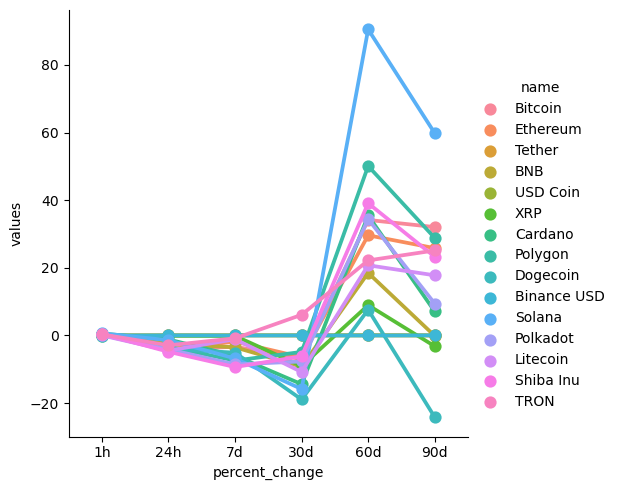

In [39]:
plt.show()